In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers , models
# from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train=y_train.reshape(-1,)

In [5]:
def plot_sample(X,y ,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

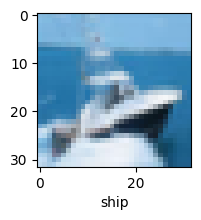

In [6]:
plot_sample(X_train,y_train,8)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs= 10)

: 

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [ ]:
y_pred =cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
classes[y_classes[100]]

In [ ]:
plot_sample(X_test,y_test,100)